In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

 ## MODEL 1 : 3 Layers with 1 Convolution layer

In [5]:
model_1 = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])     

In [6]:
model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step
## Training for 5 epochs.

In [7]:
model_1.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5291 - accuracy: 0.9407
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0815 - accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0681 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0555 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0517 - accuracy: 0.9840


## Perform Test with Test data

In [8]:
test_loss, accuracy = model_1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.1077 - accuracy: 0.9763 - 898ms/epoch - 3ms/step

Test loss :  0.10770335793495178
Test accuracy : 0.9763000011444092


In [10]:
test_images = tf.cast(test_images, tf.float32)
pred = model_1.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 2ms/step


In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

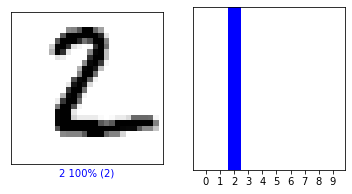

In [13]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

In [14]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [15]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[151, 175, 184, 247, 259, 282, 321, 340, 381, 445]


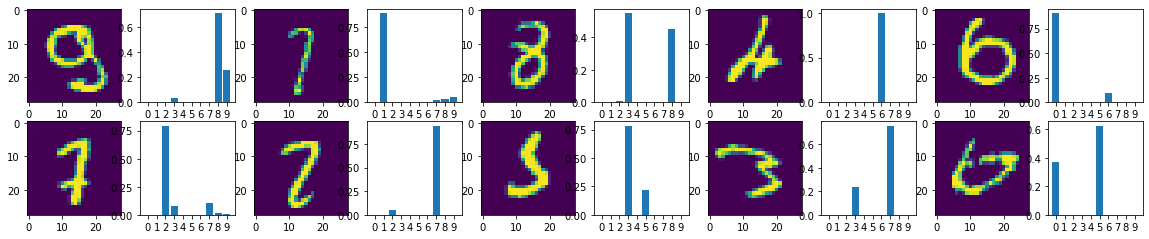

In [16]:
plot_error(index_slice, pred, test_labels)

 ## MODEL 2 : 5 Layers with 2 Convolution layer

In [20]:
model_2 = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])

In [23]:
model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step
## Training for 5 epochs.

In [24]:
model_2.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3594 - accuracy: 0.9458
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0687 - accuracy: 0.9801
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0559 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0472 - accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0391 - accuracy: 0.9879


## Perform Test with Test data

In [25]:
test_loss, accuracy = model_2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.0577 - accuracy: 0.9830 - 1s/epoch - 3ms/step

Test loss :  0.057729609310626984
Test accuracy : 0.9829999804496765


In [26]:
test_images = tf.cast(test_images, tf.float32)
pred = model_2.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 3ms/step


In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

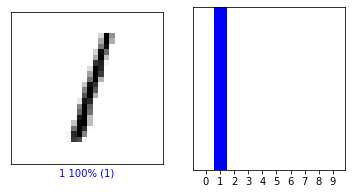

In [31]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

In [32]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[18, 111, 151, 247, 259, 320, 333, 445, 449, 479]


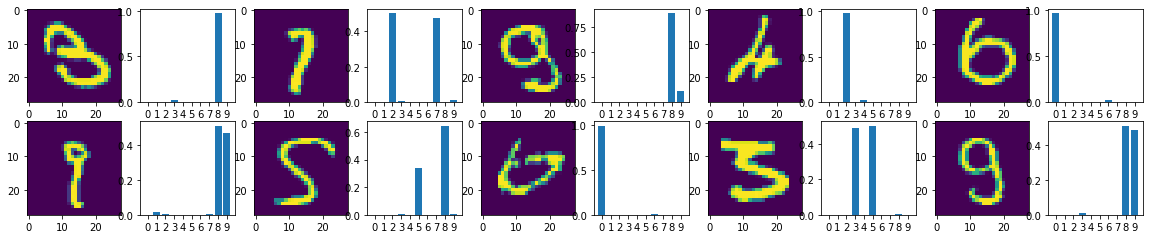

In [33]:
plot_error(index_slice, pred, test_labels)

 ## MODEL 3 : 7 Layers with 4 Convolution layer

In [34]:
model_3 = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])    

In [35]:
model_3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step
## Training for 5 epochs.

In [36]:
model_3.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1621 - accuracy: 0.9579
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0544 - accuracy: 0.9828
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0413 - accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0336 - accuracy: 0.9899


## Perform Test with Test data

In [37]:
test_loss, accuracy = model_3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.0504 - accuracy: 0.9871 - 1s/epoch - 4ms/step

Test loss :  0.05041772499680519
Test accuracy : 0.9871000051498413


In [38]:
test_images = tf.cast(test_images, tf.float32)
pred = model_3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 3ms/step


In [39]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

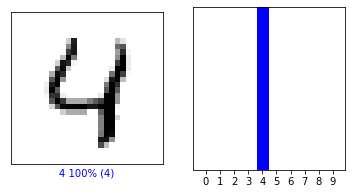

In [40]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

In [41]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[15, 167, 217, 352, 445, 543, 625, 659, 674, 716]


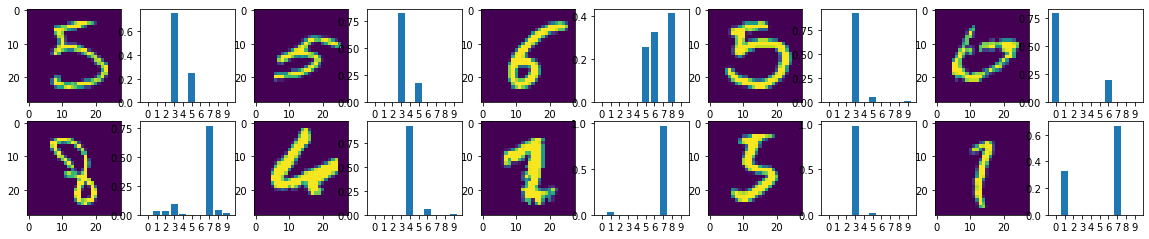

In [42]:
plot_error(index_slice, pred, test_labels)

In [ ]:
DONE